<a href="https://colab.research.google.com/github/rahiakela/practical-machine-learning-with-tensorflow/blob/week-6/assignment6_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

Install and import all the necessary libraries for the assignment.

In [1]:
!pip install tensorflow==2.0.0-rc0

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')

tf.random.set_seed(1)

     |████████████████████████████████| 86.3MB 29.1MB/s 
     |████████████████████████████████| 501kB 55.0MB/s 
     |████████████████████████████████| 4.3MB 25.7MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


## Importing the dataset

In [0]:
boston_dataset = load_boston()

data_X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data_Y = pd.DataFrame(boston_dataset.target, columns=["target"])
data = pd.concat([data_X, data_Y], axis=1)

In [13]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
print(len(train), "train examples")
print(len(test), "test examples")

404 train examples
102 test examples


Converting the Pandas DataFrames into Tensorflow Datasets

In [0]:
def df_to_dataset(dataframe, shuffle_and_repeat=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle_and_repeat:
    ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.repeat()
    
  ds = ds.batch(batch_size)
  
  return ds

## Defining Feature Columns

In [15]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16,11.7


In [16]:
# define feature_columns as a list of all the features as numeric columns using functions from tf.feature_column
feature_columns = []
for key in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']:
  print('Key: ', key)
  feature_columns.append(tf.feature_column.numeric_column(key=key))

Key:  CRIM
Key:  ZN
Key:  INDUS
Key:  CHAS
Key:  NOX
Key:  RM
Key:  AGE
Key:  DIS
Key:  RAD
Key:  TAX
Key:  PTRATIO
Key:  B
Key:  LSTAT


In [21]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16,11.7


## Building the model

Train the model by using the df_to_dataset function. Batch size should be 32. Note that while training the model, the shuffle_and_repeat parameter of the df_to_dataset function should be set to True.

1) Follow the instructions given in the colab notebook to train a linear regression model on the data for 2500 steps. On evaluating 
	   on the test data, what is the range of average loss of the trained model?

In [24]:
from IPython.display import clear_output

config = tf.estimator.RunConfig(tf_random_seed=1)

# Build the model using tf.estimator and pass as config variable to the config parameter of the estimator
linear_est = tf.estimator.LinearRegressor(feature_columns, config=config)

# Train model
linear_est.train(input_fn=lambda: df_to_dataset(train, shuffle_and_repeat=True), steps=2500)

# Evaluation
result = linear_est.evaluate(input_fn=lambda: df_to_dataset(test, shuffle_and_repeat=False))

clear_output()
print(pd.Series(result))

average_loss         40.825123
label/mean           22.574509
loss                 39.727837
prediction/mean      23.850624
global_step        2500.000000
dtype: float64


2) Now train a DNN regressor model on the data for 3000 steps. Your network should have one hidden layer of 10 neurons. Leave
	   the other parameters (except config) on their default values. On evaluating on the test data, what is the range of average
	   loss of the trained model?

In [28]:
# Build the model using tf.estimator by using hidden layer of 10 neurons and config variable to the config parameter of the estimator
linear_est = tf.estimator.DNNRegressor(feature_columns=feature_columns, hidden_units=[10], config=config)

# Train model
linear_est.train(input_fn=lambda: df_to_dataset(train, shuffle_and_repeat=True), steps=3000)

# Evaluation
result = linear_est.evaluate(input_fn=lambda: df_to_dataset(test, shuffle_and_repeat=False))

clear_output()
print(pd.Series(result))

average_loss        178.134644
label/mean           22.574509
loss                172.040466
prediction/mean      19.430790
global_step        3000.000000
dtype: float64


3) Train the model of Q2 for 6000 steps instead of 3000 steps. Evaluate the trained model on both the training data and the
	   test data. What is the range of difference between the average loss on the training data and the test data?

In [30]:
# Build the model using tf.estimator by using hidden layer of 10 neurons and config variable to the config parameter of the estimator
linear_est = tf.estimator.DNNRegressor(feature_columns=feature_columns, hidden_units=[10], config=config)

# Train model
linear_est.train(input_fn=lambda: df_to_dataset(train, shuffle_and_repeat=True), steps=6000)

# Evaluation on training data
result = linear_est.evaluate(input_fn=lambda: df_to_dataset(train, shuffle_and_repeat=False))

clear_output()
print(pd.Series(result))

average_loss        100.413063
label/mean           22.522278
loss                 99.559967
prediction/mean      22.992477
global_step        6000.000000
dtype: float64


In [31]:
# Evaluation on test data
result = linear_est.evaluate(input_fn=lambda: df_to_dataset(test, shuffle_and_repeat=False))

clear_output()
print(pd.Series(result))

average_loss        123.552399
label/mean           22.574509
loss                125.876984
prediction/mean      20.107664
global_step        6000.000000
dtype: float64


4) Train a boosted trees regressor on the data for 50 steps. Set n_batches_per_layer as 1, center_bias as True and leave
	   the other parameters (except config) on their default values. On evaluating on the test data, what is the range of average
	    loss of the trained model?

In [34]:
config = tf.estimator.RunConfig(tf_random_seed=2)
b_tree_reg = tf.estimator.BoostedTreesRegressor(feature_columns=feature_columns, n_batches_per_layer=1, center_bias=True,config=config)

# Train model
b_tree_reg.train(input_fn=lambda: df_to_dataset(train, shuffle_and_repeat=True), max_steps=50)

# Evaluation on training data
result = b_tree_reg.evaluate(input_fn=lambda: df_to_dataset(test, shuffle_and_repeat=False))

clear_output()
print(pd.Series(result))

average_loss       35.500908
label/mean         22.574509
loss               36.922520
prediction/mean    22.987827
global_step        50.000000
dtype: float64


## Boosted Trees Interpretation

In [35]:
pred_dicts = list(b_tree_reg.experimental_predict_with_explanations(lambda: df_to_dataset(test, False, 32)))

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmn166x7g', '_tf_random_seed': 2, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f210bea6b38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring p

In [36]:
# Create DFC Pandas dataframe.
predictions = pd.Series([pred['predictions'][0] for pred in pred_dicts])
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
df_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,102.0,0.087104,1.068922,-1.168713,-0.515589,-0.443272,0.849339,2.649084
AGE,102.0,-0.076721,2.571598,-5.668249,-1.376902,-0.736720,1.268285,7.857016
RM,102.0,0.641221,1.517036,-0.718578,-0.310247,-0.310247,1.734433,4.963449
LSTAT,102.0,-0.313566,1.397890,-3.806632,-1.158268,0.296644,0.497698,4.360538
B,102.0,-0.037300,0.386109,-0.719116,-0.065505,-0.024197,0.000000,1.316914
TAX,102.0,-0.053832,0.104176,-0.155605,-0.155605,0.000000,0.000000,0.166702
PTRATIO,102.0,-0.047474,0.207822,-0.649448,0.000000,0.000000,0.018440,1.102076
CHAS,102.0,0.095863,0.339953,0.000000,0.000000,0.000000,0.000000,2.401405
CRIM,102.0,-0.401408,0.704238,-2.897705,-0.617287,-0.297707,0.000000,0.520723
DIS,102.0,-0.155832,0.737975,-0.807175,-0.415455,-0.415453,0.000000,1.903496


In [0]:
# Sum of DFCs + bias == probabality.
bias = pred_dicts[0]['bias']
dfc_pred = df_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_pred.values,
                               predictions.values)

In [0]:
# Boilerplate code for plotting :)
def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(test.iloc[ID][sorted_ix], ax)
  return ax

5)  you will observe the plotted graphs in the notebook and answer simple questions about DFCs.
	   We have plotted the feature contributions for the 10th example of the test data. Which feature has the largest contribution
	   to the predicted value?

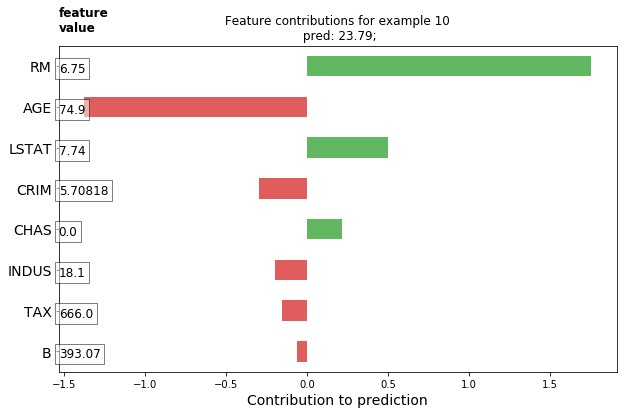

In [39]:
# Plot results.
ID = 10
example = df_dfc.iloc[ID]  # Choose ith example from evaluation set.
TOP_N = 8  # View top 8 features.
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f};'.format(ID, predictions[ID]))
ax.set_xlabel('Contribution to prediction', size=14)
plt.show()

In [0]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = df_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(test.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to prediction', size=14)

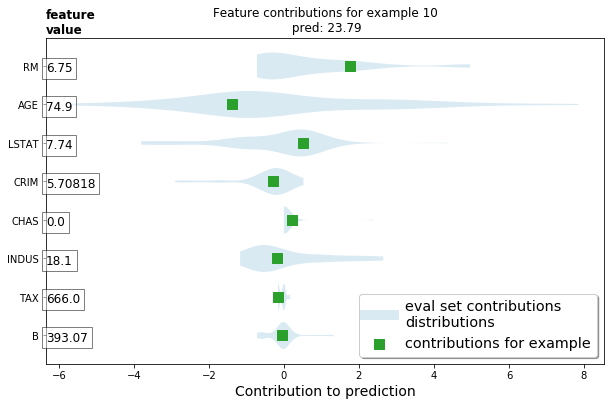

In [41]:
dist_violin_plot(df_dfc, ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}'.format(ID, predictions[ID]))
plt.show()

## Gain-based feature importances

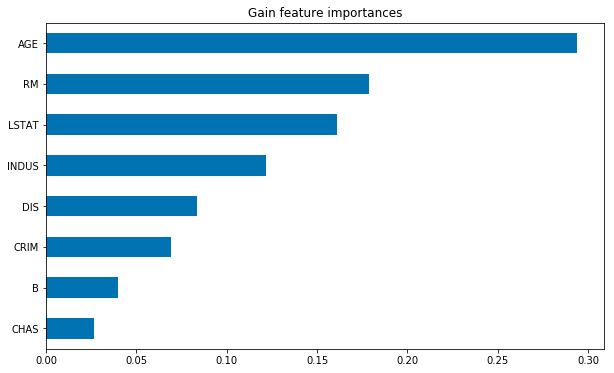

In [43]:
importances = b_tree_reg.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')

You can also see how DFCs vary as a feature value varies.

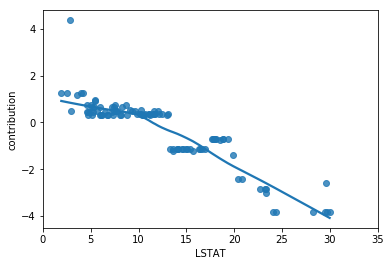

In [44]:
FEATURE = 'LSTAT'
feature = pd.Series(df_dfc[FEATURE].values, index=test[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 35)
plt.show()